# imports

In [585]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

In [586]:
# read files

In [587]:
file_comments = './data_original/github_1000stars_comments.csv'
file_issues = './data_original/github_1000stars_issues.csv'
df_comments = pd.read_csv(file_comments)
df_issues = pd.read_csv(file_issues)
df_comments_copy = df_comments.copy()
df_issues_copy = df_issues.copy()

In [588]:
path = './results/'

In [589]:
def save_graph(G, graph_name):
    filepath = path + 'graph/' + graph_name + '.gexf'
    nx.write_gexf(G, filepath)

In [833]:
def save_graph_pic(plt, pic_name):
    filepath = './figures/' + 'plots/' + pic_name + '.png'
    plt.savefig(filepath)

In [590]:
def save_csv(df, file_name):
    filepath = path + 'data_created/' + file_name + '.csv'
    df.to_csv(filepath, index = False)  

In [743]:
def save_fig(fig, fig_name):
    filepath = './figures/' + 'plots/' + fig_name + '.png'
    fig.savefig(filepath)

In [591]:
df_comments.head()

,Repository,ID,User,CreatedAt,CountReactions,CountLike,CountDislike,Sentiment,SentimentScore
0,[freeCodeCamp]freeCodeCamp,1,BerkeleyTrue,2014-12-24,0,0,0,NEGATIVE,0.9721
1,[freeCodeCamp]freeCodeCamp,1,BerkeleyTrue,2014-12-24,0,0,0,NEGATIVE,0.9990
2,[freeCodeCamp]freeCodeCamp,1,jonocosa,2014-12-24,0,0,0,POSITIVE,0.9945
3,[freeCodeCamp]freeCodeCamp,1,QuincyLarson,2014-12-24,0,0,0,NEGATIVE,0.9966
4,[freeCodeCamp]freeCodeCamp,1,QuincyLarson,2014-12-24,0,0,0,NEGATIVE,0.9988


In [592]:
df_issues.head()

,Repository,ID,User,Type,State,CommitId,CreatedAt,ClosedAt,IsMerged,CountReactions,CountLike,CountDislike
0,[freeCodeCamp]freeCodeCamp,1,jonocosa,issue,closed,NaN,2014-12-24,2014-12-26,False,0,0,0
1,[freeCodeCamp]freeCodeCamp,2,BerkeleyTrue,pull,closed,4e24b90688fdf14d81b36e7f8866506f0425e6c7,2014-12-24,2014-12-27,True,0,0,0
2,[freeCodeCamp]freeCodeCamp,3,ghost,issue,closed,NaN,2014-12-26,2014-12-27,False,0,0,0
3,[freeCodeCamp]freeCodeCamp,4,brandenbyers,issue,closed,NaN,2014-12-28,2015-01-17,False,0,0,0
4,[freeCodeCamp]freeCodeCamp,5,QuincyLarson,pull,closed,3b7c34d442ea994d196fcaf719aaa3607503bf7c,2014-12-31,2014-12-31,True,0,0,0


In [667]:
fb_react_app = df_issues[df_issues['Repository'] == '[facebook]create-react-app']['User']

In [668]:
len(fb_react_app.value_counts()

6274

# all repositories

In [594]:
all_repositories = df_issues['Repository'].value_counts()

In [822]:
len(all_repositories)

45

In [596]:
all_repositories[:10]

[freeCodeCamp]freeCodeCamp    10000
[mrdoob]three.js              10000
[microsoft]terminal           10000
[angular]angular              10000
[kubernetes]kubernetes        10000
[nodejs]node                  10000
[golang]go                    10000
[ytdl-org]youtube-dl          10000
[facebook]create-react-app    10000
[vuejs]vue                    10000
Name: Repository, dtype: int64

In [597]:
all_repositories[-10:]

[CyC2018]CS-Notes                          973
[ossu]computer-science                     960
[labuladong]fucking-algorithm              816
[trekhleb]javascript-algorithms            655
[jlevy]the-art-of-command-line             566
[codecrafters-io]build-your-own-x          528
[torvalds]linux                            449
[justjavac]free-programming-books-zh_CN    424
[donnemartin]system-design-primer          343
[jackfrued]Python-100-Days                 225
Name: Repository, dtype: int64

In [598]:
# check_reps_full = ['[freeCodeCamp]freeCodeCamp','[mrdoob]three.js','[microsoft]terminal','[angular]angular','[kubernetes]kubernetes','[nodejs]node','[golang]go','[ytdl-org]youtube-dl','[facebook]create-react-app','[vuejs]vue']
check_reps_test = ['[freeCodeCamp]freeCodeCamp','[microsoft]terminal']

In [749]:
first_10 = ['[freeCodeCamp]freeCodeCamp','[mrdoob]three.js','[microsoft]terminal','[angular]angular','[kubernetes]kubernetes','[nodejs]node','[golang]go','[ytdl-org]youtube-dl','[facebook]create-react-app','[vuejs]vue']
last_10 = ['[CyC2018]CS-Notes','[ossu]computer-science','[labuladong]fucking-algorithm','[trekhleb]javascript-algorithms','[jlevy]the-art-of-command-line','[codecrafters-io]build-your-own-x','[torvalds]linux','[justjavac]free-programming-books-zh_CN','[donnemartin]system-design-primer','[jackfrued]Python-100-Days']

In [750]:
# df = last_10.copy()
# size = len(df)-1
# for i in range(0,size//2):
#     tmp = df[i]
#     df[i] = df[size-i]
#     df[size-i] = tmp
# last_10 = df.copy()

In [751]:
# last_10

In [752]:
check_reps_full = first_10 + last_10

In [603]:
def get_rep_info(rep_comments, rep_issues):    
    # display(rep_comments.head())
    # display(rep_issues.head())
    print("rep_comments")
    display(rep_comments['ID'].value_counts())
    print("rep_issues")
    display(rep_issues['ID'].value_counts())
    
    print("in ",repository," we have len(ID) = ", end="")
    print(len(rep_comments['ID'].value_counts()))
    print("in ",repository," pr/i we have len(ID) = ", end="")
    print(len(rep_issues['ID'].value_counts()))

    print("Max task id", max(rep_issues['ID'].values))

In [604]:
def get_users_network_df(repository):
    """
        For given repository return all network of users
    """
    
    rep_comments = df_comments[df_comments['Repository'] == repository]
    rep_issues = df_issues[df_issues['Repository'] == repository]
    
    get_rep_info(rep_comments, rep_issues)

    # get all users from comments
    df_three_users_c = rep_comments.copy()
    to_drop = ['Repository', 'CreatedAt', 'CountReactions', 'CountLike', 'CountDislike', 'Sentiment', 'SentimentScore']
    df_three_users_c = df_three_users_c.drop(columns = to_drop)

    # get all tasks from pr/issue
    df_three_users_ac = rep_issues.copy()
    to_drop = ['Repository', 'Type', 'State', 'CommitId', 'CreatedAt', 'ClosedAt', 'IsMerged', 'CountReactions', 'CountLike', 'CountDislike']
    df_three_users_ac = df_three_users_ac.drop(columns = to_drop)

    frames = [df_three_users_ac, df_three_users_c]
    df_three_users_merged = pd.concat(frames)
    df_three_users_merged = df_three_users_merged.sort_values(by='ID', ascending = True)
    df_three_users_merged_no_dupl = df_three_users_merged.drop_duplicates()
    # display(df_three_users_merged_no_dupl.head(10))
    # print("get graph func finished")
    
    return df_three_users_merged_no_dupl


# networkx

In [605]:
def prepare_data(nb_links, df):
    """ 
    nb_links = 0 will proceed all data
    nb_links != will take a part of data
    """
    # nb_links = 14
    if nb_links != 0:
        df_tmp = df[:nb_links]
    else:
        df_tmp = df
        nb_links = len(df)
        
    id_pri = list(df_tmp["ID"].unique())
    id_user = list(df_tmp["User"].unique())
    size = range(0, nb_links)

    edge_list = []
    for i in size:
        left = df_tmp['ID'].iloc[i]
        right = df_tmp['User'].iloc[i]
        pair = (left, right)
        edge_list.append(pair)
    return id_pri, id_user, edge_list

In [606]:
def get_bipartite_graph(id_pri, id_user, edge_list):
    B = nx.Graph()
    B.add_nodes_from(id_pri, node_type = "PRI", bipartite = 0)
    B.add_nodes_from(id_user, node_type = "User", bipartite = 1)
    B.add_edges_from(edge_list)
    return B

In [607]:
def get_graph_for_repository(repository):
    print("working on ",repository,"repository")
    users_network_df = get_users_network_df(repository)
    id_pri, id_user, edge_list = prepare_data(0, users_network_df)

    # Bipartite graph
    B = get_bipartite_graph(id_pri, id_user, edge_list)
    bipartite.is_bipartite(B)

    # Projection on user
    G_users = bipartite.weighted_projected_graph(B, id_user)

    # save_graph(B, repository+'_graph_full')
    save_graph(G_users, repository+'_graph_users')

In [608]:
# # create gephi graphs
# for repository in check_reps_full:
# # for repository in check_reps_test:
#     get_graph_for_repository(repository)

In [609]:
def get_graphs(list_repositories):
    G_users_all = list()
    repositories = list()

    for repository in list_repositories:
        repositories.append(repository)
        users_network_df = get_users_network_df(repository)
        id_pri, id_user, edge_list = prepare_data(0, users_network_df)

        # Bipartite graph
        B = get_bipartite_graph(id_pri, id_user, edge_list)
        bipartite.is_bipartite(B)

        # Projection on user
        G_users = bipartite.weighted_projected_graph(B, id_user)
        print("saving graph for",repository,"repository")
        # save_graph(B, repository+'_graph_full')
        save_graph(G_users, repository+'_graph_users')
        G_users_all.append(G_users)
    return G_users_all

In [755]:
G_first_10 = get_graphs(first_10)

saving graph for [freeCodeCamp]freeCodeCamp repository
saving graph for [mrdoob]three.js repository
saving graph for [microsoft]terminal repository
saving graph for [angular]angular repository
saving graph for [kubernetes]kubernetes repository
saving graph for [nodejs]node repository
saving graph for [golang]go repository
saving graph for [ytdl-org]youtube-dl repository
saving graph for [facebook]create-react-app repository
saving graph for [vuejs]vue repository


In [756]:
G_last_10 = get_graphs(last_10)

saving graph for [CyC2018]CS-Notes repository
saving graph for [ossu]computer-science repository
saving graph for [labuladong]fucking-algorithm repository
saving graph for [trekhleb]javascript-algorithms repository
saving graph for [jlevy]the-art-of-command-line repository
saving graph for [codecrafters-io]build-your-own-x repository
saving graph for [torvalds]linux repository
saving graph for [justjavac]free-programming-books-zh_CN repository
saving graph for [donnemartin]system-design-primer repository
saving graph for [jackfrued]Python-100-Days repository


In [757]:
G_all_users = G_first_10 + G_last_10

In [758]:
 len(G_all_users)

20

# Cumulative Distribution

In [759]:
import matplotlib.pyplot as plt

# Set the background color of the figure to white
plt.style.use('default')
plt.style.use({'figure.facecolor':'white'})
# plt.grid(color='blue', linestyle='--', linewidth=0.5)
# plt.show()

In [745]:
def plot_degree_c_dist(G_users_all, repositories, title_text):

    # NUM_COLORS = len(G_users_all)
    # cm = plt.get_cmap('gist_rainbow')
    # fig, ax = plt.subplots(figsize=(12, 12))
    fig, ax = plt.subplots(figsize=(12, 12))

    labels = repositories
    # colors = [ 'black', 'darkblue', 'blue', 'lightblue', 'lightgreen', 'Orange',
    #           'darkgreen', 'yellow', 'lightyellow', 'brown', ]
    index = 0
    maxx = 0
    # ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS,NUM_COLORS*2)])
    
    for G_users in G_users_all:
        # Create an example graph
        G = G_users
        # Calculate the degree histogram
        deg_hist = nx.degree_histogram(G)
        if max(deg_hist) > maxx:
            maxx = max(deg_hist)
        # Calculate the cumulative distribution
        
        cumulative_dist = [sum(deg_hist[:i+1]) for i in range(len(deg_hist))]
        if max(cumulative_dist) > maxx:
            maxx = max(cumulative_dist)
       
        # Plot the cumulative distribution
        plt.plot(cumulative_dist,'-', label=labels[index]) #, 
                 # color = colors[index]) 
        
        # plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label=labels[index], color = colors[index]) 
        index = index + 1
    
    start = maxx//28
    finish = maxx//10
    plt.xlim(-start, maxx+finish)
    plt.ylim(-start, maxx+finish)
    # ax.set_aspect(1) # x = y
    ax.grid(True)

    plt.legend(labels, loc="lower right")
    # plt.legend()
    
    #degree ditribution
    full_title = 'Cumulative step histograms for ' + title_text + ' repositories'
    plt.title(full_title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()
    save_fig(fig, full_title)
    

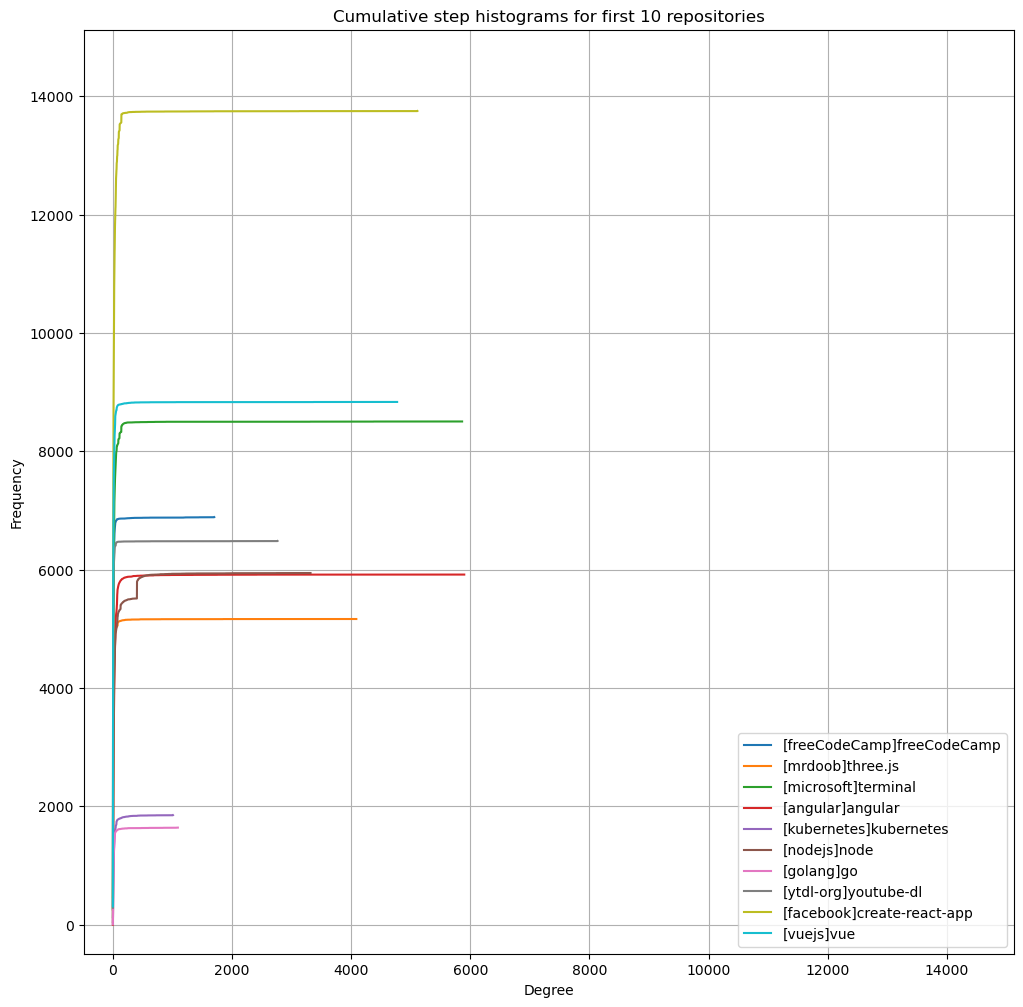

In [869]:
title = 'first 10'
plot_degree_c_dist(G_users_all, first_10, title)

In [712]:
# degree / nb teams
# 1000 - 10/10
# 2000 - 7/10
# 4000 - 5/10
# 5000 - 3/10
# 6000 - 2/10

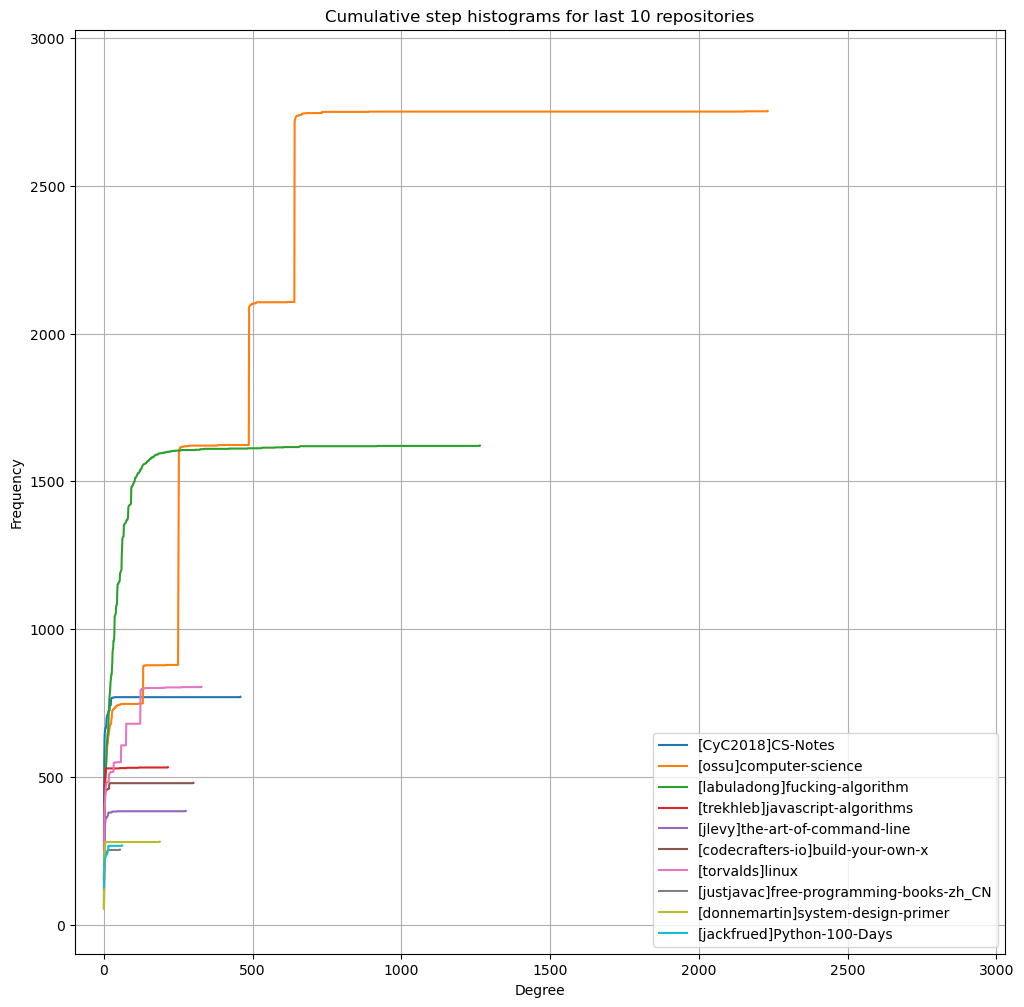

In [761]:
plot_degree_c_dist(G_last_10, last_10, 'last 10')

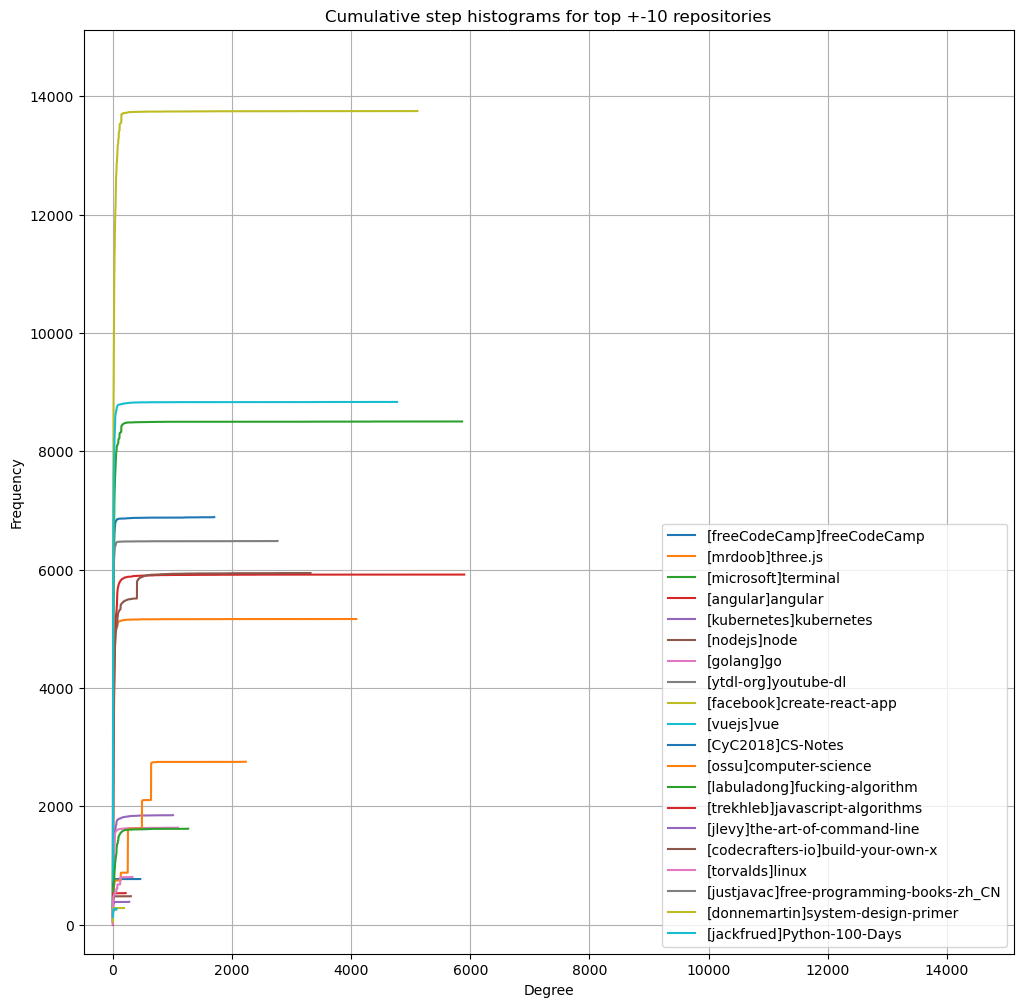

In [762]:
plot_degree_c_dist(G_all_users, check_reps_full, 'top +-10')

In [863]:
# log-test

In [866]:
def plot_degree_c_log_dist(G_users_all, repositories, title_text):

    # NUM_COLORS = len(G_users_all)
    # cm = plt.get_cmap('gist_rainbow')
    # fig, ax = plt.subplots(figsize=(12, 12))
    fig, ax = plt.subplots(figsize=(12, 12))

    labels = repositories
    # colors = [ 'black', 'darkblue', 'blue', 'lightblue', 'lightgreen', 'Orange',
    #           'darkgreen', 'yellow', 'lightyellow', 'brown', ]
    index = 0
    maxx = 0
    # ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS,NUM_COLORS*2)])
    
    for G_users in G_users_all:
        # Create an example graph
        G = G_users
        # Calculate the degree histogram
        deg_hist = nx.degree_histogram(G)
        if max(deg_hist) > maxx:
            maxx = max(deg_hist)
        # Calculate the cumulative distribution
        
        cumulative_dist = [sum(deg_hist[:i+1]) for i in range(len(deg_hist))]
        if max(cumulative_dist) > maxx:
            maxx = max(cumulative_dist)
       
        # Plot the cumulative distribution
        plt.loglog(range(len(cumulative_dist)), cumulative_dist, '-', label=labels[index])

        # plt.plot(cumulative_dist,'-', label=labels[index]) #, 
                 # color = colors[index]) 
        
        # plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label=labels[index], color = colors[index]) 
        index = index + 1
    
    start = maxx//28
    finish = maxx//10
    plt.xlim(-start, maxx+finish)
    plt.ylim(-start, maxx+finish)
    # ax.set_aspect(1) # x = y
    ax.grid(True)

    plt.legend(labels, loc="lower right")
    # plt.legend()
    
    #degree ditribution
    full_title = 'Cumulative step histograms for ' + title_text + ' repositories'
    plt.title(full_title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()
    save_fig(fig, full_title)
    

/var/folders/zy/0n165qy96vxgpv3m2z9_5tf00000gn/T/ipykernel_9634/4244791501.py:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-start, maxx+finish)
/var/folders/zy/0n165qy96vxgpv3m2z9_5tf00000gn/T/ipykernel_9634/4244791501.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-start, maxx+finish)


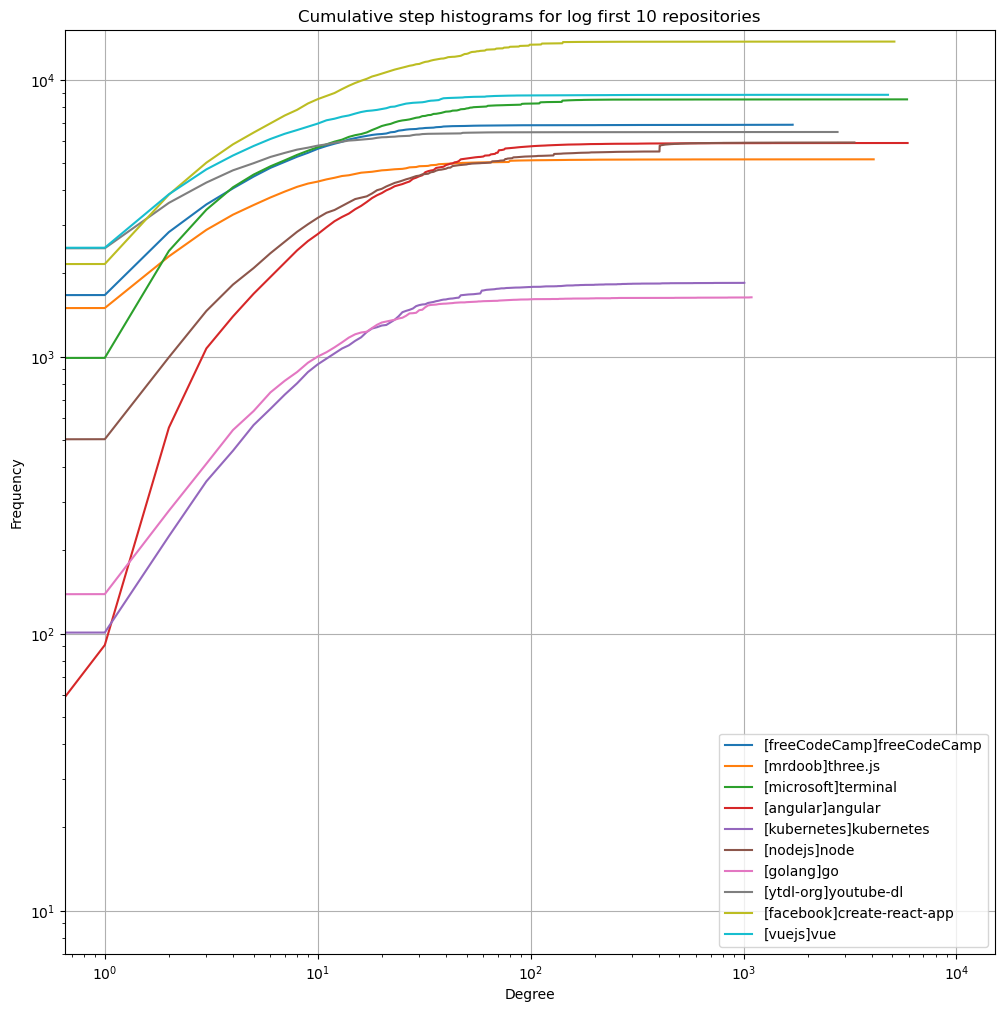

In [868]:
title = 'log first 10'
plot_degree_c_log_dist(G_users_all, first_10, title)

In [ ]:
# visualisation of diff commmunities

In [ ]:
#todo: network analysys corness, k-core

In [ ]:
# explane with data handling

In [ ]:
# interpritation (+perspective)
# new way to work
# limits/perspectivs
# ethics aspect (boss fired person / best use)

In [114]:
# todo: change color for bipartite graph

# Example on 14

In [775]:
repository_threejs = '[mrdoob]three.js'

In [852]:
users_network_df['User'].value_counts()

mrdoob             7257
WestLangley        2270
alteredq            885
Mugen87             645
bhouston            638
                   ... 
bafla13               1
MrSparkle-zz          1
BlueMockingbird       1
trousers              1
Jude-Austin           1
Name: User, Length: 5165, dtype: int64

In [776]:
users_network_df = get_users_network_df(repository_threejs)
id_pri, id_user, edge_list = prepare_data(14, users_network_df)

## Bipartite graph

In [777]:
# Create a bipartite graph
B = nx.Graph()
B.add_nodes_from(id_pri, node_type = "PRI", bipartite = 0)
B.add_nodes_from(id_user, node_type = "User", bipartite = 1)
B.add_edges_from(edge_list)

In [778]:
bipartite.is_bipartite(B)

True

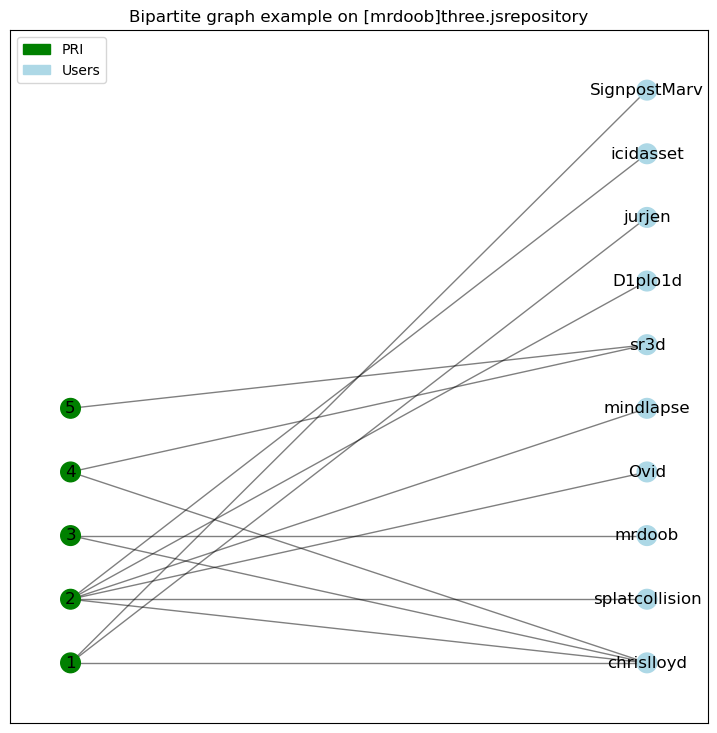

In [856]:
# # Get the sets of nodes
# left_nodes_pri, right_nodes_user = nx.bipartite.sets(B)

# # horisontal - 0/index #vertical - index/0

# # Draw the graph
# pos = dict()
# pos.update((node, (0, index)) for index, node in enumerate(left_nodes_pri))
# pos.update((node, (1, index)) for index, node in enumerate(right_nodes_user))
# nx.draw(B, pos=pos, with_labels=True)

# # Show the plot
# plt.show()
plt.figure(figsize=(9, 9))

# Get the sets of nodes
left_nodes_pri, right_nodes_user = nx.bipartite.sets(B)

# Define colors for the two types of nodes
pri_colors = ['green' for node in left_nodes_pri]
user_colors = ['lightblue' for node in right_nodes_user]

# Define positions for the nodes
pos = dict()
pos.update((node, (0, index)) for index, node in enumerate(left_nodes_pri))
pos.update((node, (1, index)) for index, node in enumerate(right_nodes_user))

# Create a dictionary to map each node to its label
labels = dict()
for i,node in enumerate(left_nodes_pri):
    labels[node] = id_pri[i]
for i,node in enumerate(right_nodes_user):
    labels[node] = id_user[i]

# Draw the nodes separately, using the appropriate colors and labels
nx.draw_networkx_nodes(B, pos, nodelist=left_nodes_pri, node_color=pri_colors, node_size=200)
nx.draw_networkx_nodes(B, pos, nodelist=right_nodes_user, node_color=user_colors, node_size=200)

# Draw the edges
nx.draw_networkx_edges(B, pos, width=1.0, alpha=0.5)

# Add the labels to the nodes
nx.draw_networkx_labels(B, pos, labels)

# Add a legend
# plt.legend(['PRI','User'], loc='upper left')
legend_elements = [Patch(facecolor='green', edgecolor='green', label='PRI'),
                   Patch(facecolor='lightblue', edgecolor='lightblue', label='Users')]
plt.legend(handles=legend_elements, bbox_to_anchor=(0, 1), loc='upper left')

graph_name = 'Bipartite graph example on ' + repository_threejs + 'repository'
plt.title(graph_name)

# plt.show()
save_graph_pic(plt, repository_threejs + '- bipartite graph')

## Full graph

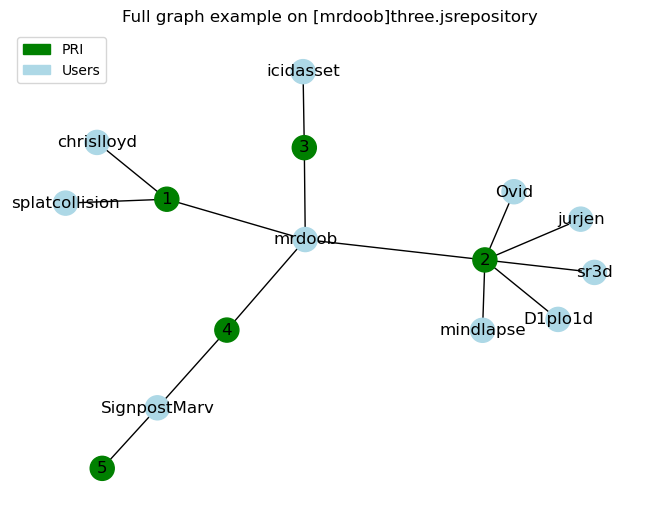

In [855]:
from networkx.algorithms import bipartite
# nx.draw(B, with_labels=True)

labels = ["Users", "PRI"]
users, pri = bipartite.sets(B)
colors = ['green' if node in users else 'lightblue' for node in B.nodes()]
nx.draw(B, with_labels=True, node_color=colors)
# plt.legend(labels, bbox_to_anchor=(1, 1), loc='upper left')
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='green', edgecolor='green', label='PRI'),
                   Patch(facecolor='lightblue', edgecolor='lightblue', label='Users')]
plt.legend(handles=legend_elements, bbox_to_anchor=(0, 1), loc='upper left')


graph_name = 'Full graph example on ' + repository_threejs + 'repository'
plt.title(graph_name)
# plt.show()

save_graph_pic(plt, repository_threejs + '- full graph')

### Projection on users

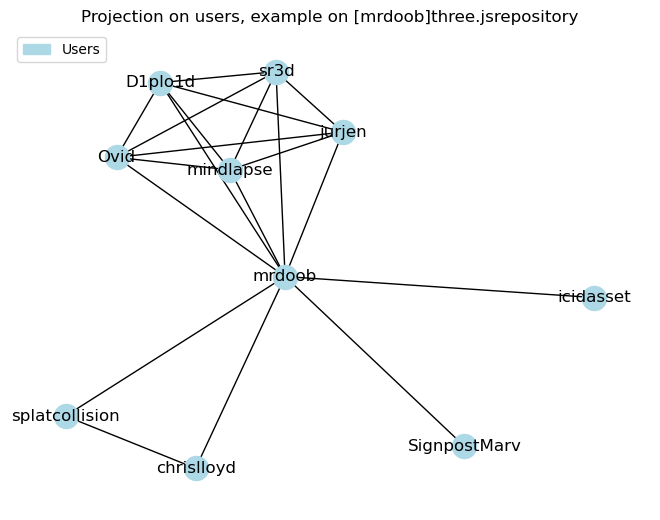

In [858]:
G = bipartite.projected_graph(B, id_user)
nx.draw(G, with_labels=True,node_color='lightblue')

legend_elements = [Patch(facecolor='lightblue', edgecolor='lightblue', label='Users')]
plt.legend(handles=legend_elements, bbox_to_anchor=(0, 1), loc='upper left')

graph_name = 'Projection on users, example on ' + repository_threejs + 'repository'
plt.title(graph_name)

save_graph_pic(plt, repository_threejs + '- projection on users')
# list(G.edges())

### Projection on tasks/comments

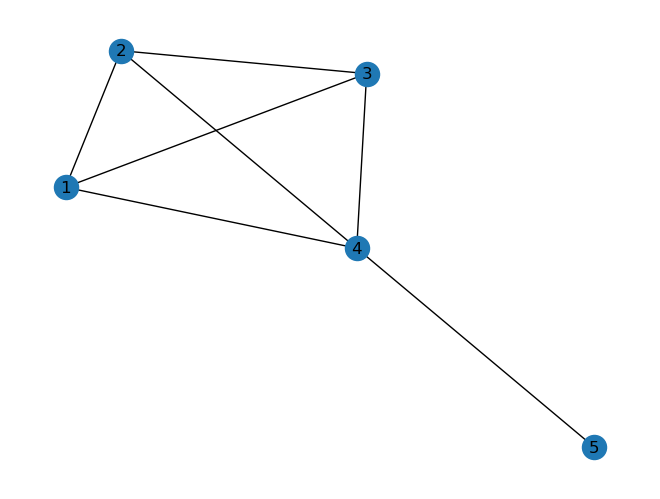

In [108]:
G = bipartite.projected_graph(B, id_pri)
nx.draw(G, with_labels=True)
# list(G.edges())

# Full data

In [424]:
df_tmp = users_network_df

In [425]:
id_pri = list(df_tmp["ID"].unique())
id_user = list(df_tmp["User"].unique())
nb_links = len(df_tmp)

In [426]:
nb_links

27548

In [427]:
size = range(0, nb_links)

edge_list = []
for i in size:
    left = df_tmp['ID'].iloc[i]
    right = df_tmp['User'].iloc[i]
    pair = (left, right)
    edge_list.append(pair)

In [428]:
len(edge_list)

27548

## Bipartite graph

In [429]:
# Create a bipartite graph
B = nx.Graph()
B.add_nodes_from(id_pri, node_type = "PRI", bipartite = 0)
B.add_nodes_from(id_user, node_type = "User", bipartite = 1)
B.add_edges_from(edge_list)

In [433]:
bipartite.is_bipartite(B)

True

### Projection on users

In [447]:
G_users = bipartite.weighted_projected_graph(B, id_user)

In [912]:
df_user_edjes = nx.to_pandas_edgelist(G_users)

In [916]:
df_user_edjes['source'].value_counts()

yyx990803      4772
posva          3323
LinusBorg      1201
vue-bot         915
fnlctrl         792
               ... 
suifeng123        1
tomsseisums       1
casbloem          1
onlyurei          1
wxs77577          1
Name: source, Length: 3908, dtype: int64

### Projection on tasks/comments

In [434]:
# G_pri = bipartite.projected_graph(B, id_pri)

# Save graphs

In [445]:
save_graph(B, 'graph_full')

In [448]:
save_graph(G_users, 'graph_users')

# test microsoft

In [455]:
repository = '[microsoft]TypeScript'

In [456]:
df_three_comments = df_comments[df_comments['Repository'] == repository]
df_three = df_issues[df_issues['Repository'] == repository]

In [457]:
df_three.head()

,Repository,ID,User,Type,State,CommitId,CreatedAt,ClosedAt,IsMerged,CountReactions,CountLike,CountDislike
226328,[microsoft]TypeScript,1,RyanCavanaugh,issue,closed,NaN,2014-07-14,2014-09-19,False,0,0,0
226329,[microsoft]TypeScript,2,danquirk,pull,closed,e9cd8a0e884d5c363b00facd5c6cf26045f46432,2014-07-14,2014-07-15,True,0,0,0
226330,[microsoft]TypeScript,3,danquirk,pull,closed,e9cd8a0e884d5c363b00facd5c6cf26045f46432,2014-07-15,2014-07-15,False,0,0,0
226331,[microsoft]TypeScript,4,DanielRosenwasser,pull,closed,455364cf5a2e4f9cece69599475677bb41e2ac36,2014-07-15,2014-07-15,False,0,0,0
226332,[microsoft]TypeScript,5,RyanCavanaugh,issue,closed,NaN,2014-07-15,2015-01-14,False,0,0,0


In [458]:
df_three_comments.head()

,Repository,ID,User,CreatedAt,CountReactions,CountLike,CountDislike,Sentiment,SentimentScore
1007222,[microsoft]TypeScript,1,RyanCavanaugh,2014-07-28,0,0,0,POSITIVE,0.9978
1007223,[microsoft]TypeScript,1,philipbulley,2014-08-08,0,0,0,POSITIVE,0.9945
1007224,[microsoft]TypeScript,1,basarat,2014-08-11,0,0,0,POSITIVE,0.9945
1007225,[microsoft]TypeScript,1,diverted247,2014-08-12,0,0,0,POSITIVE,0.9988
1007226,[microsoft]TypeScript,1,galloscript,2014-08-23,0,0,0,NEGATIVE,0.9996


In [459]:
df_three_users_ac = df_three.copy()
to_drop = ['Repository', 'Type', 'State', 'CommitId', 'CreatedAt', 'ClosedAt', 'IsMerged', 'CountReactions', 'CountLike', 'CountDislike']
df_three_users_ac = df_three_users_ac.drop(columns = to_drop)

In [460]:
df_three_users_ac.head()

,ID,User
226328,1,RyanCavanaugh
226329,2,danquirk
226330,3,danquirk
226331,4,DanielRosenwasser
226332,5,RyanCavanaugh


In [461]:
df_three_users_c = df_three_comments.copy()
to_drop = ['Repository', 'CreatedAt', 'CountReactions', 'CountLike', 'CountDislike', 'Sentiment', 'SentimentScore']
df_three_users_c = df_three_users_c.drop(columns = to_drop)

In [462]:
df_three_users_c.head()

,ID,User
1007222,1,RyanCavanaugh
1007223,1,philipbulley
1007224,1,basarat
1007225,1,diverted247
1007226,1,galloscript


In [463]:
frames = [df_three_users_ac, df_three_users_c]
df_three_users_merged = pd.concat(frames)
df_three_users_merged = df_three_users_merged.sort_values(by='ID', ascending = True)

## Merged

In [464]:
df_three_users_merged.head()

,ID,User
226328,1,RyanCavanaugh
1007247,1,ahejlsberg
1007246,1,jntrnr
1007245,1,NoelAbrahams
1007244,1,RyanCavanaugh


In [465]:
df_three_users_merged_no_dupl = df_three_users_merged.drop_duplicates()

In [466]:
df_three_users_merged_no_dupl.head()

,ID,User
226328,1,RyanCavanaugh
1007247,1,ahejlsberg
1007246,1,jntrnr
1007245,1,NoelAbrahams
1007243,1,csnover


In [467]:
len(df_three_users_merged_no_dupl)

33389

## prepare data

In [468]:
df_tmp = df_three_users_merged_no_dupl
id_pri = list(df_tmp["ID"].unique())
id_user = list(df_tmp["User"].unique())
nb_links = len(df_tmp)

In [469]:
size = range(0, nb_links)

edge_list = []
for i in size:
    left = df_tmp['ID'].iloc[i]
    right = df_tmp['User'].iloc[i]
    pair = (left, right)
    edge_list.append(pair)

### bipartite graph microsoft

In [470]:
# Create a bipartite graph
B = nx.Graph()
B.add_nodes_from(id_pri, node_type = "PRI", bipartite = 0)
B.add_nodes_from(id_user, node_type = "User", bipartite = 1)
B.add_edges_from(edge_list)

In [471]:
### users

In [472]:
G_users = bipartite.weighted_projected_graph(B, id_user)

In [473]:
save_graph(G_users, 'graph_users_microsoft')

In [ ]:
# todo: fini microsoft here?

In [ ]:
# # test for graph
# # Create a bipartite graph
# T = nx.Graph()
# T.add_nodes_from([1, 2, 3], bipartite=0)
# T.add_nodes_from(['a', 'b', 'c'], bipartite=1)
# T.add_edges_from([(1, 'a'), (1, 'c'),  (1, 'b'), 
#                   (2, 'b'),  
#                   (3, 'a'), (3, 'b'),
#                  ])

# # Get the sets of nodes
# left_nodes, right_nodes = nx.bipartite.sets(T)

# # Draw the graph
# pos = dict()
# pos.update((node, (1, index)) for index, node in enumerate(left_nodes))
# pos.update((node, (2, index)) for index, node in enumerate(right_nodes))
# nx.draw(T, pos=pos, with_labels=True)

# # Show the plot
# plt.show()

In [860]:
# nx.draw_networkx(
#     B, with_labels=True,
#     pos = nx.drawing.layout.bipartite_layout(B, left_nodes), 
#     width = edge_widths*1) 

In [73]:
# for id_user in df_three_users_merged["ID"].unique():
#     G.add_node(id_user, node_type="PR-issue", bipartite=0)

In [65]:
# for id_pri in df_three_users_merged["User"].unique():
#     G.add_node(id_pri, node_type="User", bipartite=1)

In [ ]:
# G.add_edges_from()

In [93]:
# G = nx.from_pandas_edgelist(df_three_users_merged, 'ID', 'User')

In [98]:
# G = nx.bipartite.gnmk_random_graph(3, 5, 10, seed=123)
# top = nx.bipartite.sets(G)[0]
# pos = nx.bipartite_layout(G, top)

In [68]:
first = len(df_three_users_merged["ID"].unique())
second = len(df_three_users_merged["User"].unique())
nb_links = len(df_three_users_merged)

In [74]:
G.nodes[1]

{'node_type': 'PR-issue', 'bipartite': 0}

In [ ]:
# # B = nx.Graph()
# # Add nodes with the node attribute "bipartite"
# B.add_nodes_from([1, 2, 3, 4], bipartite=0)
# B.add_nodes_from(["a", "b", "c"], bipartite=1)
# # Add edges only between nodes of opposite node sets
# B.add_edges_from(
# [(1, "a"), 
#  (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")
# ])

In [ ]:
# G = nx.bipartite.gnmk_random_graph(first, second, nb_links, seed=0)
# top = nx.bipartite.sets(G)[0]
# pos = nx.bipartite_layout(G, top)

In [ ]:
# from matplotlib.pyplot import figure
# figure(figsize=(10, 8))
# nx.draw_shell(G, with_labels=False)

In [258]:
# G.nodes[1]

In [51]:
for IDnode in df_three_users_merged["User"].unique():
    G.add_node(IDnode, node_type="User")

In [ ]:
# for i in nb_links:
#     left = df_three_users_merged['ID']
#     right = df_three_users_merged['User']
#     G.add_edges_from(left, right)

In [257]:
# G = nx.from_pandas_edgelist(df_three_users_merged, 'ID', 'User')

In [859]:
# from matplotlib.pyplot import figure
# figure(figsize=(10, 8))
# nx.draw_shell(G, with_labels=True)

In [ ]:
# todo: v1 - loop add node (add properties, edges)
# v2  - xport biprototype

In [281]:
from matplotlib.pyplot import figure

In [289]:
# G.nodes['chrislloyd']

{}

In [285]:
nb_connections = {}
for x in G.nodes:
    nb_connections[x] = len(G[x])
s = pd.Series(nb_connections, name='connections')
df_nb_connections = s.to_frame().sort_values('connections', ascending=False).reset_index()

## P/I - c - user

In [206]:
df_three.head()

,Repository,ID,User,Type,State,CommitId,CreatedAt,ClosedAt,IsMerged,CountReactions,CountLike,CountDislike
238087,[mrdoob]three.js,1,chrislloyd,issue,closed,NaN,2010-04-25,2010-04-26,False,0,0,0
238088,[mrdoob]three.js,2,Ovid,issue,closed,NaN,2010-04-26,2010-11-04,False,0,0,0
238089,[mrdoob]three.js,3,icidasset,issue,closed,NaN,2010-06-20,2010-06-21,False,0,0,0
238090,[mrdoob]three.js,4,SignpostMarv,issue,closed,NaN,2010-06-23,2010-06-24,False,0,0,0
238091,[mrdoob]three.js,5,SignpostMarv,issue,closed,NaN,2010-06-23,2010-06-23,False,0,0,0


In [207]:
df_three['User'].value_counts()

bhouston         313
WestLangley      274
gero3            208
ghost            192
Mugen87          126
                ... 
simar88            1
matter-io2         1
erichanson         1
Linjx80779921      1
sam-g-steel        1
Name: User, Length: 3701, dtype: int64

In [208]:
df_three_comments.head()

,Repository,ID,User,CreatedAt,CountReactions,CountLike,CountDislike,Sentiment,SentimentScore
1063146,[mrdoob]three.js,1,mrdoob,2010-04-25,0,0,0,POSITIVE,0.9977
1063147,[mrdoob]three.js,1,splatcollision,2011-01-10,0,0,0,POSITIVE,0.9990
1063148,[mrdoob]three.js,2,mrdoob,2010-04-26,0,0,0,POSITIVE,0.7345
1063149,[mrdoob]three.js,2,Ovid,2010-04-26,0,0,0,POSITIVE,0.9975
1063150,[mrdoob]three.js,2,jurjen,2010-04-30,0,0,0,POSITIVE,0.9921


# Microsoft

In [823]:
microsoft_projects = ['[microsoft]terminal', '[microsoft]TypeScript', '[microsoft]vscode']

In [824]:
facebook_projects = ['[facebook]create-react-app', '[facebook]react-native', '[facebook]react']

In [861]:
G_microsoft_projects = get_graphs(microsoft_projects)

saving graph for [microsoft]terminal repository
saving graph for [microsoft]TypeScript repository
saving graph for [microsoft]vscode repository


In [862]:
G_microsoft_projects = get_graphs(facebook_projects)

saving graph for [facebook]create-react-app repository
saving graph for [facebook]react-native repository
saving graph for [facebook]react repository


# three js

In [870]:
repository_threejs = '[mrdoob]three.js'

In [871]:
df_three_comments = df_comments[df_comments['Repository'] == repository_threejs]
df_three = df_issues[df_issues['Repository'] == repository_threejs]

In [873]:
df_three.head()

,Repository,ID,User,Type,State,CommitId,CreatedAt,ClosedAt,IsMerged,CountReactions,CountLike,CountDislike
238087,[mrdoob]three.js,1,chrislloyd,issue,closed,NaN,2010-04-25,2010-04-26,False,0,0,0
238088,[mrdoob]three.js,2,Ovid,issue,closed,NaN,2010-04-26,2010-11-04,False,0,0,0
238089,[mrdoob]three.js,3,icidasset,issue,closed,NaN,2010-06-20,2010-06-21,False,0,0,0
238090,[mrdoob]three.js,4,SignpostMarv,issue,closed,NaN,2010-06-23,2010-06-24,False,0,0,0
238091,[mrdoob]three.js,5,SignpostMarv,issue,closed,NaN,2010-06-23,2010-06-23,False,0,0,0


In [872]:
df_three_comments.head()

,Repository,ID,User,CreatedAt,CountReactions,CountLike,CountDislike,Sentiment,SentimentScore
1063146,[mrdoob]three.js,1,mrdoob,2010-04-25,0,0,0,POSITIVE,0.9977
1063147,[mrdoob]three.js,1,splatcollision,2011-01-10,0,0,0,POSITIVE,0.9990
1063148,[mrdoob]three.js,2,mrdoob,2010-04-26,0,0,0,POSITIVE,0.7345
1063149,[mrdoob]three.js,2,Ovid,2010-04-26,0,0,0,POSITIVE,0.9975
1063150,[mrdoob]three.js,2,jurjen,2010-04-30,0,0,0,POSITIVE,0.9921


In [932]:
def get_df_user_nb_con_percent(repository):
    df_three_users_origin = get_users_network_df(repository)

    df_three_users = pd.DataFrame(df_three_users_origin['User'].value_counts())
    df_three_users = df_three_users.reset_index(level=0, inplace=False)
    df_three_users.columns = ['user_name', 'nb_connections']

    total_connections = df_three_users['nb_connections'].sum()
    # print("ttl nb=", total_connections)
    df_three_users['nb_connections_percent'] = df_three_users['nb_connections'].apply(lambda x: x/total_connections*100)

    return df_three_users

In [928]:
df_three_users_origin = get_users_network_df(repository_threejs)
# df_three_users = pd.DataFrame(df_three_users_origin['User'].value_counts())

In [934]:
df_three_users_origin.head()

,ID,User
238087,1,chrislloyd
1063147,1,splatcollision
1063146,1,mrdoob
1063148,2,mrdoob
1063149,2,Ovid


In [933]:
df_three_users = get_df_user_nb_con_percent(repository_threejs)

ttl nb= 27548


In [926]:
total_nb_ppl_three = len(df_three_users['user_name'])

In [927]:
total_nb_ppl_three

5165

In [ ]:
# How to diff?
# take maximum presentage
# if diff in precentag >= 10%

In [908]:
df_three_users.head(10)

,user_name,nb_connections,nb_connections_percent
0,mrdoob,7257,26.343110
1,WestLangley,2270,8.240163
2,alteredq,885,3.212574
3,Mugen87,645,2.341368
4,bhouston,638,2.315958
5,gero3,503,1.825904
6,zz85,335,1.216059
7,makc,307,1.114418
8,ghost,296,1.074488
9,tschw,266,0.965587


In [894]:
# from all users takeonly significant part

In [937]:
df_tmp = df_three_users_origin
id_pri = list(df_tmp["ID"].unique())
id_user = list(df_tmp["User"].unique())
nb_links = len(df_tmp)
size = range(0, nb_links)

edge_list = []
for i in size:
    left = df_tmp['ID'].iloc[i]
    right = df_tmp['User'].iloc[i]
    pair = (left, right)
    edge_list.append(pair)

In [938]:
B = get_bipartite_graph(id_pri, id_user, edge_list)
G_users_three = bipartite.weighted_projected_graph(B, id_user)
df_user_edjes = nx.to_pandas_edgelist(G_users_three)
# df_user_edjes.head()

In [940]:
df_user_edjes_cp = df_user_edjes.copy()

In [957]:
df_user_edjes.head()

,source,target,weight
0,chrislloyd,mrdoob,1
1,chrislloyd,splatcollision,1
2,splatcollision,mrdoob,2
3,splatcollision,gero3,1
4,splatcollision,rastafermo,1


In [962]:
# df_user_edjes[['source','target']].groupby(by=['source'])['weight'].sum()
df_user_edjes.groupby(by=['source'])[['target','weight']].sum()

source
0xor1           2
1147079942      1
180and170      18
23d1            7
2lost4u        45
             ... 
zsitro          1
ztxxxx0000      1
zwcloud         6
zydecode        4
zz85          633
Name: weight, Length: 1955, dtype: int64

In [917]:
df = list()
for rep in microsoft_projects:
    df_microsoft = get_df_user_nb_con_percent(rep)
    df.append(df_microsoft)

In [919]:
df[0].head(10)

,user_name,nb_connections,nb_connections_percent
0,msftbot[bot],5026,14.266655
1,zadjii-msft,4649,13.196514
2,DHowett-MSFT,3227,9.160067
3,DHowett,2672,7.584660
4,miniksa,921,2.614323
5,carlos-zamora,649,1.842232
6,j4james,640,1.816685
7,skyline75489,568,1.612308
8,Don-Vito,314,0.891311
9,WSLUser,260,0.738028


In [920]:
df[1].head(10)

,user_name,nb_connections,nb_connections_percent
0,mhegazy,5023,15.043877
1,DanielRosenwasser,2511,7.520441
2,RyanCavanaugh,2241,6.711791
3,vladima,1071,3.207643
4,danquirk,891,2.668544
5,ahejlsberg,701,2.099494
6,JsonFreeman,595,1.782024
7,CyrusNajmabadi,591,1.770044
8,yuit,526,1.575369
9,sandersn,523,1.566384


In [921]:
df[2].head(10)

,user_name,nb_connections,nb_connections_percent
0,bpasero,2573,7.673267
1,joaomoreno,1515,4.518072
2,alexdima,1354,4.037934
3,Tyriar,1342,4.002147
4,aeschli,1226,3.656209
5,isidorn,1210,3.608493
6,jrieken,1191,3.551831
7,egamma,995,2.967315
8,dbaeumer,993,2.961350
9,weinand,757,2.257545
